In [1]:
from fABBA import loadData
from fABBA import JABBA

In [2]:
from llmabba.abba import XABBA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from llmabba.abba import compress
from llmabba.abba import inv_compress

### Single time series

In [4]:
ts = np.array([np.sin(0.05*i) for i in range(1000)])  # original time series (Trigonometric sine series of 1000 points)

In [5]:
pieces = compress(ts, 0.5)
inv_ts = inv_compress(pieces, ts[0])

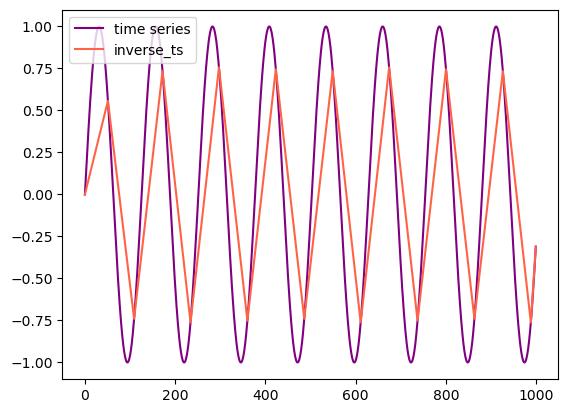

In [6]:
plt.plot(ts, label='time series', c='purple')
plt.plot(inv_ts, label='inverse_ts', c='tomato')
plt.legend()

In [7]:
ab = JABBA(tol=0.2, alpha=0.5, verbose=1)
string = ab.fit_transform(ts, n_jobs=1)
''.join(string[0])

Init 1 processors.
Generate 4 symbols


'aBbBbBbBbBbBbBbBA'

In [8]:
inv_ts1 = ab.inverse_transform(string)
string[0][1] = 'b'
inv_ts2 = ab.inverse_transform(string)

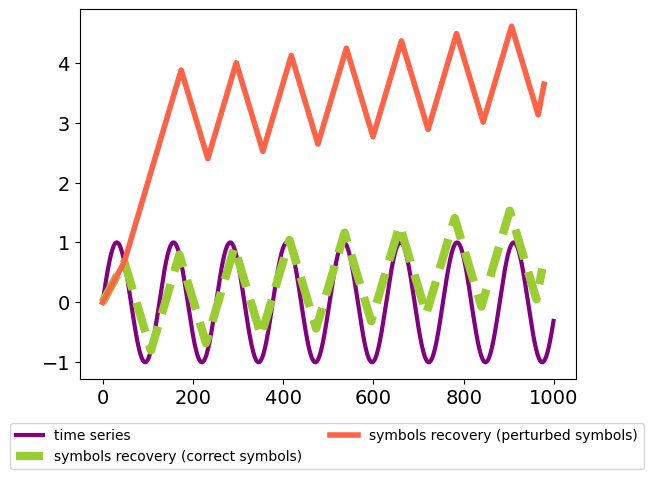

In [9]:
plt.plot(ts, label='time series', c='purple', linewidth=3)
plt.plot(inv_ts1, label='symbols recovery (correct symbols)', c='yellowgreen', linewidth=6, linestyle='--')
plt.plot(inv_ts2, label='symbols recovery (perturbed symbols)', c='tomato', linewidth=4, linestyle='-')
plt.legend(bbox_to_anchor=(1.15, -0.1), ncols=2)
plt.tick_params(axis='both', which='both', labelsize=14)
plt.savefig('save/ex1.pdf', bbox_inches='tight')
plt.show()

In [10]:
xab = XABBA(tol=0.2, alpha=0.5, bits_for_len=32, bits_for_inc=32, verbose=1)
string = xab.fit_transform(ts, n_jobs=1)
''.join(string[0])

Init 1 processors.
The length of used symbols is: 4
Generate 4 symbols


'abBbBbBbBbBbBbBbA'

In [11]:
xinv_ts1 = xab.inverse_transform(string)
string[0][1] = 'B'
xinv_ts2 = xab.inverse_transform(string)

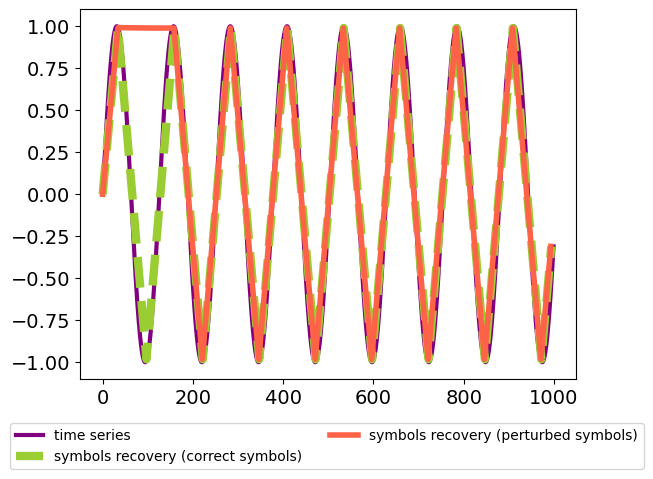

In [12]:
plt.plot(ts, label='time series', c='purple', linewidth=3)
plt.plot(xinv_ts1, label='symbols recovery (correct symbols)', c='yellowgreen', linewidth=6, linestyle='--')
plt.plot(xinv_ts2, label='symbols recovery (perturbed symbols)', c='tomato', linewidth=4, linestyle='-')
plt.legend(bbox_to_anchor=(1.15, -0.1), ncols=2)
plt.tick_params(axis='both', which='both', labelsize=14)
plt.savefig('save/ex2.pdf', bbox_inches='tight')
plt.show()

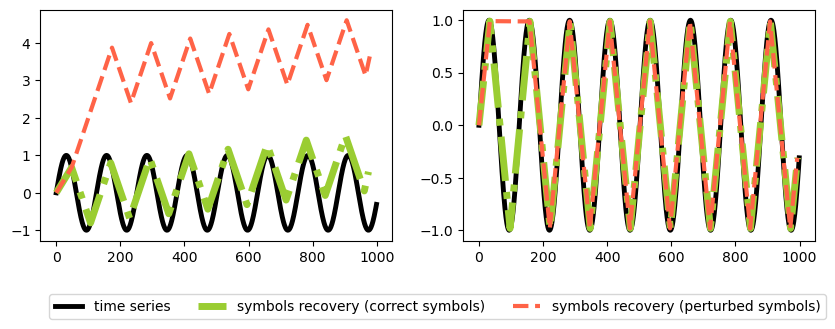

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(ts, label='time series', c='black', linewidth=3.5)
axs[0].plot(inv_ts1, label='symbols recovery (correct symbols)', c='yellowgreen', linewidth=5, linestyle='-.')
axs[0].plot(inv_ts2, label='symbols recovery (perturbed symbols)', c='tomato', linewidth=3, linestyle='--')
axs[0].tick_params(axis='both', which='both', labelsize=10)

axs[1].plot(ts, label='time series', c='black', linewidth=3.5)
axs[1].plot(xinv_ts1, label='symbols recovery (correct symbols)', c='yellowgreen', linewidth=5, linestyle='-.')
axs[1].plot(xinv_ts2, label='symbols recovery (perturbed symbols)', c='tomato', linewidth=3, linestyle='--')
axs[1].tick_params(axis='both', which='both', labelsize=10)

plt.legend(bbox_to_anchor=(1.05, -0.2), ncols=3)

plt.savefig('save/ex3.pdf', bbox_inches='tight')
plt.show()

### Multiple time series

In [14]:
train, test = loadData()

#### fit data

In [15]:
xab = XABBA(tol=0.1, alpha=0.1, verbose=1)
string = xab.fit_transform(train, n_jobs=40)

inv_ts = xab.inverse_transform(string)

The length of used symbols is: 312
Generate 312 symbols


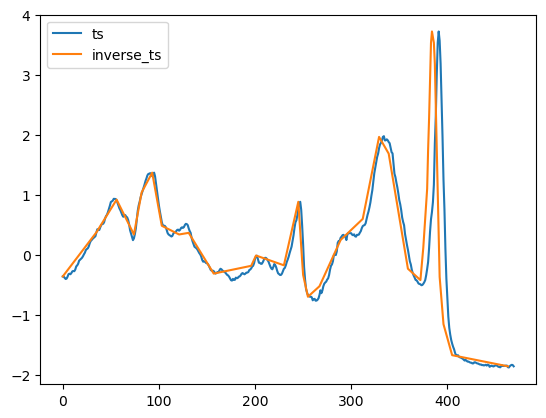

In [16]:
plt.plot(train[0], label='ts')
plt.plot(inv_ts[0], label='inverse_ts')
plt.legend()

#### for out of sample data

In [17]:
string, inits = xab.transform(test, n_jobs=40)
inv_ts = xab.inverse_transform(string)

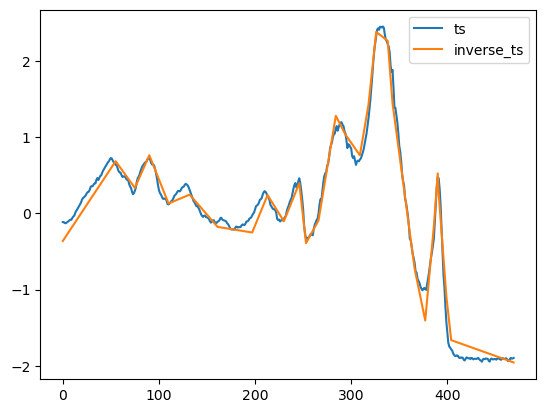

In [18]:
plt.plot(test[0], label='ts')
plt.plot(inv_ts[0], label='inverse_ts')
plt.legend()

In [22]:
import pickle


def save_abba(model, filename):
    pickle.dump(model, file = open(filename, "wb"))

def load_abba(filename):
    return pickle.load(open(filename, "rb"))

save_abba(xab, 'abba_model.pkl')
xab2 = load_abba('abba_model.pkl')

In [23]:
xinv_ts1 = xab2.inverse_transform(string)

In [24]:
xinv_ts1

[[-0.36292248,
  -0.34390205173454147,
  -0.3248816234690829,
  -0.30586119520362437,
  -0.28684076693816585,
  -0.26782033867270727,
  -0.24879991040724875,
  -0.22977948214179023,
  -0.21075905387633168,
  -0.19173862561087313,
  -0.1727181973454146,
  -0.15369776907995605,
  -0.13467734081449753,
  -0.11565691254903898,
  -0.09663648428358046,
  -0.07761605601812194,
  -0.05859562775266336,
  -0.03957519948720484,
  -0.02055477122174626,
  -0.0015343429562877375,
  0.017486085309170785,
  0.03650651357462936,
  0.055526941840087884,
  0.0745473701055464,
  0.09356779837100493,
  0.11258822663646345,
  0.13160865490192203,
  0.1506290831673806,
  0.16964951143283907,
  0.18866993969829765,
  0.20769036796375612,
  0.2267107962292147,
  0.24573122449467327,
  0.26475165276013174,
  0.2837720810255903,
  0.3027925092910489,
  0.3218129375565075,
  0.34083336582196594,
  0.3598537940874245,
  0.3788742223528831,
  0.39789465061834156,
  0.41691507888380014,
  0.4359355071492587,
  0.454